# Lecture 17: Pandas

__Reading Material:__
- [Pandas Tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)

You also need to install Pandas via
`conda install pandas=1.5.2`

In [2]:
import pandas
pandas.__version__

'1.5.2'

## Pandas

We use the modules pandas and matplotlib to import a dataset and create a nice visualization. Pandas assumes that your data file has rows separated by newlines, and columns separated by an expression that you specify. It also assumes that the first row contains the names of your columns. We start with the dataset on LSD and math scores1 from
[this page](http://stat.ufl.edu/~winner/datasets.html).

In [3]:
f = open('lsd.txt').read()
print(type(f))
print(f)

<class 'str'>
drug	math
1.17	78.93
2.97	58.20
3.26	67.47
4.69	37.47
5.83	45.65
6.00	32.92
6.41	29.97



We first import the data in a .txt file into pandas as follows:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [6]:
print("\t")# tab

In [7]:
lsd = pd.read_table('lsd.txt',sep='\t')
print(type(lsd))
print(lsd)

<class 'pandas.core.frame.DataFrame'>
   drug   math
0  1.17  78.93
1  2.97  58.20
2  3.26  67.47
3  4.69  37.47
4  5.83  45.65
5  6.00  32.92
6  6.41  29.97


In [8]:
print(lsd['math'])

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: math, dtype: float64


In [10]:
lsd.math

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: math, dtype: float64

In [11]:
lsd.math>50

0     True
1     True
2     True
3    False
4    False
5    False
6    False
Name: math, dtype: bool

In [12]:
print(lsd[lsd.math>50])

   drug   math
0  1.17  78.93
1  2.97  58.20
2  3.26  67.47


Pandas lets us call the separate columns by their name using commands __lsd['math']__ and __lsd['drug']__. 

We can use these directly as lists to input into pyplot and create a scatter plot.

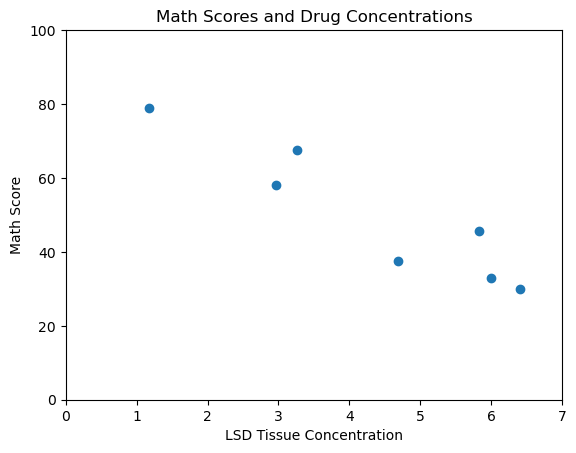

In [13]:
plt.plot(lsd['drug'],lsd['math'],'o')
plt.axis([0, 7, 0, 100])
plt.ylabel('Math Score')
plt.xlabel('LSD Tissue Concentration') 
plt.title('Math Scores and Drug Concentrations') 
plt.show()

We now do the same for a data set on "Comparison of 6 Lengths of Chop Sticks of Feeding Efficiency" on the [dataset page](http://stat.ufl.edu/~winner/datasets.html) and use a bar plot to visualize the data set.

In [14]:
cs = pd.read_table('chopstick2_rcb.dat',sep='\s+')
# \s+ markers are “any white space character, one or more times”
# \s+ 标记是“任何空白字符，一次或多次”
print(type(cs))
cs

<class 'pandas.core.frame.DataFrame'>


,eff,type,subject
0,19.55,1,1
1,27.24,1,2
2,28.76,1,3
3,31.19,1,4
4,21.91,1,5
...,...,...,...
181,27.22,6,27
182,17.41,6,28
183,16.42,6,29
184,28.22,6,30


In [15]:
#cs[cs['type']==1]
cs[(cs['type']==1)&(cs['eff']>25)] # use & for elementwise bool operations

,eff,type,subject
1,27.24,1,2
2,28.76,1,3
3,31.19,1,4
5,27.62,1,6
6,29.46,1,7
7,26.35,1,8
8,26.69,1,9
9,30.22,1,10
10,27.81,1,11
13,27.85,1,14


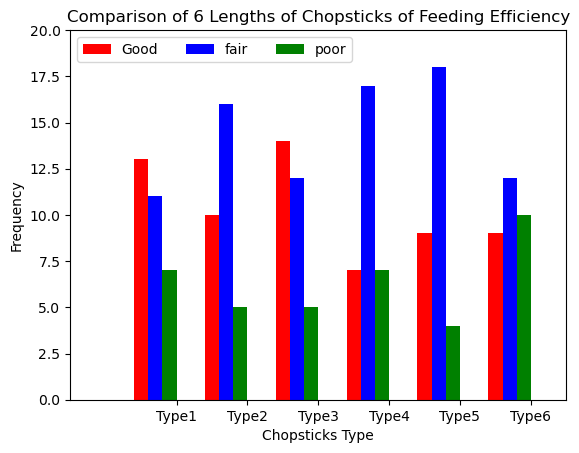

In [18]:
cs = pd.read_table('chopstick2_rcb.dat',sep='\s+')
type1 = cs['type']==1 
type2 = cs['type']==2
type3 = cs['type']==3
type4 = cs['type']==4
type5 = cs['type']==5
type6 = cs['type']==6
good = cs['eff'] >= 27
fair = (cs['eff']>= 22) & (cs['eff'] < 27)
poor = cs['eff']<22 
barwidth=.2
plt.axis([-1, 6, 0, 20])
plt.ylabel('Frequency')
plt.xlabel('Chopsticks Type')
plt.title('Comparison of 6 Lengths of Chopsticks of Feeding Efficiency') 
plt.xticks(np.arange(6)+1/2,['Type1','Type2','Type3','Type4','Type5','Type6']) 

plt.bar(np.arange(6),[len(cs[type1 & good]),
                      len(cs[type2 & good]),
                      len(cs[type3 & good]), 
                      len(cs[type4 & good]), 
                      len(cs[type5 & good]), 
                      len(cs[type6 & good])], 
        barwidth, color='r', label='Good')
plt.bar(np.arange(6)+barwidth,[len(cs[type1 & fair]),
                               len(cs[type2 & fair]),
                               len(cs[type3 & fair]), 
                               len(cs[type4 & fair]), 
                               len(cs[type5 & fair]), 
                               len(cs[type6 & fair])], 
        barwidth, color='b', label='fair')
plt.bar(np.arange(6)+2*barwidth,[len(cs[type1 & poor]),
                                 len(cs[type2 & poor]),
                                 len(cs[type3 & poor]), 
                                 len(cs[type4 & poor]), 
                                 len(cs[type5 & poor]), 
                                 len(cs[type6 & poor])], 
        barwidth, color='g', label='poor')

plt.legend(loc="upper left", ncol=3) 
plt.show()

### Exercises

- Create visualizations for several other datasets from the toy dataset page.